In [1]:
import cv2,os


D:\Software_Location\envs\Air\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
D:\Software_Location\envs\Air\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
D:\Software_Location\envs\Air\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


Data Source link : https://drive.google.com/drive/folders/16ce6Hc4U5Qr6YBArcozoYom6TT5-7oSc

In [2]:
data_path='Dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)

{'test': 0, 'train': 1}
['test', 'train']
[0, 1]


In [3]:
data_path='Dataset\\train'
classes_path=os.listdir(data_path)
classesf=os.listdir(data_path)
print(classesf)
labels_classes=[i for i in range(len(classesf))]
print(labels_classes)

['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [4]:
label_classes_dict=dict(zip(classesf,labels_classes))

In [5]:
print(label_classes_dict)

{'0': 0, 'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


In [6]:
import numpy as np

In [7]:
data_path='Dataset'

In [8]:
img_size=128
data=[]
target=[]
c=0
minValue = 70
for category in categories:
    
    cat_path=os.path.join(data_path,category)
    print(cat_path)
    cat_names=os.listdir(cat_path)
    print(cat_names)
    for classes in cat_names:
        folder_path=os.path.join(data_path,category,classes)
        print(folder_path)
        img_names=os.listdir(folder_path)
        #print(img_names)
        for img_name in img_names:
            #print(img_name)
            img_path=os.path.join(folder_path,img_name)
            img=cv2.imread(img_path)
            
            try:
                gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
                blur = cv2.GaussianBlur(gray,(5,5),2)
                th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)
                ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
                #res=np.array(res)
                #print(type(res))
            #Converting the image into gray scale
                resized=cv2.resize(res,(img_size,img_size))
            #resizing the gray scale into 50x50, since we need a fixed common size for all the images in the dataset
                data.append(resized)
                #print(data)
                target.append(label_classes_dict[classes])
            except Exception as e:
                print('Exception:',e)

Dataset\test
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Dataset\test\0
Dataset\test\A
Dataset\test\B
Dataset\test\C
Dataset\test\D
Dataset\test\E
Dataset\test\F
Dataset\test\G
Dataset\test\H
Dataset\test\I
Dataset\test\J
Dataset\test\K
Dataset\test\L
Dataset\test\M
Dataset\test\N
Dataset\test\O
Dataset\test\P
Dataset\test\Q
Dataset\test\R
Dataset\test\S
Dataset\test\T
Dataset\test\U
Dataset\test\V
Dataset\test\W
Dataset\test\X
Dataset\test\Y
Dataset\test\Z
Dataset\train
['0', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Dataset\train\0
Dataset\train\A
Dataset\train\B
Dataset\train\C
Dataset\train\D
Dataset\train\E
Dataset\train\F
Dataset\train\G
Dataset\train\H
Dataset\train\I
Dataset\train\J
Dataset\train\K
Dataset\train\L
Dataset\train\M
Dataset\train\N
Dataset\train\O
Dataset\train\P
Dataset\train\Q
Dataset\

In [9]:
datanp=np.array(data)

In [10]:
datanp.shape

(17113, 128, 128)

In [11]:
targetnp=np.array(target)

targetnp.shape

(17113,)

In [12]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

Using TensorFlow backend.


In [13]:
new_target.shape

(17113, 27)

In [14]:
np.save('data_img',data)
np.save('target',new_target)

In [15]:
data=np.load('data_img.npy')
target=np.load('target.npy')

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.2)

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import os

In [24]:
sz = 128
# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))


# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=256, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2


In [25]:
# Compiling the CNN
classifier.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1843264   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)               

In [20]:
from keras.callbacks import ModelCheckpoint

In [26]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',
                             monitor='val_loss',
                             verbose=0,save_best_only=True,
                             mode='auto')


In [27]:
history=classifier.fit(train_data,
                       train_target,
                       shuffle=True,epochs=10,
                       callbacks=[checkpoint],
                       validation_split=0.3)

Train on 9583 samples, validate on 4107 samples
Epoch 1/10
9583/9583 [==============================] - 95s 10ms/step - loss: 1.6952 - accuracy: 0.4730 - val_loss: 0.2839 - val_accuracy: 0.9333
Epoch 2/10
9583/9583 [==============================] - 93s 10ms/step - loss: 0.5751 - accuracy: 0.8091 - val_loss: 0.0795 - val_accuracy: 0.9854
Epoch 3/10
9583/9583 [==============================] - 95s 10ms/step - loss: 0.3837 - accuracy: 0.8719 - val_loss: 0.0190 - val_accuracy: 0.9966
Epoch 4/10
9583/9583 [==============================] - 95s 10ms/step - loss: 0.3036 - accuracy: 0.8987 - val_loss: 0.0134 - val_accuracy: 0.9978
Epoch 5/10
9583/9583 [==============================] - 100s 10ms/step - loss: 0.2713 - accuracy: 0.9129 - val_loss: 0.0106 - val_accuracy: 0.9983
Epoch 6/10
9583/9583 [==============================] - 97s 10ms/step - loss: 0.2379 - accuracy: 0.9210 - val_loss: 0.0095 - val_accuracy: 0.9985
Epoch 7/10
9583/9583 [==============================] - 99s 10ms/step - los

In [28]:
print(classifier.evaluate(test_data,test_target))

3423/3423 [==============================] - 7s 2ms/step
[0.007725459816935003, 0.9991235733032227]


In [29]:
# serialize the model to disk
print("[INFO] saving mask detector model...")
classifier.save('model.h5')
print("Done !")

[INFO] saving mask detector model...
Done !


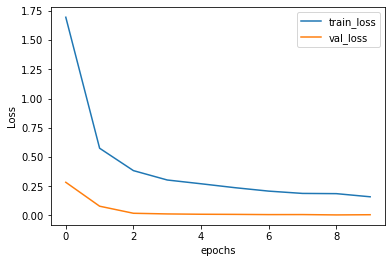

In [30]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['train_loss','val_loss'], loc=0)
plt.show()

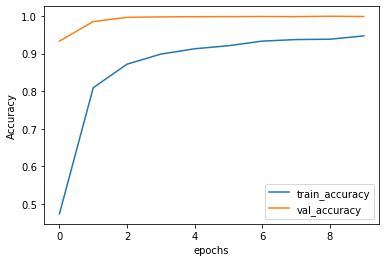

In [31]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(['train_accuracy','val_accuracy'], loc=0)
plt.show()